 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1808]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [1809]:
whale_return = Path("./Resources/whale_returns.csv")
algo_returns = Path("./Resources/algo_returns.csv")
sp500_history = Path("./Resources/sp500_history.csv")

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [1810]:
# Reading whale returns
whale_df = pd.read_csv(whale_return, index_col="Date", parse_dates= True, infer_datetime_format= True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [1811]:
# Count nulls
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [1812]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [1813]:
# Reading algorithmic returns
algo_rythm_df = pd.read_csv(algo_returns, index_col="Date", parse_dates= True, infer_datetime_format= True)
algo_rythm_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [1814]:
columns =[ "Algo", "Second_Algo"]
algo_rythm_df.columns = columns
algo_rythm_df.head()

,Algo,Second_Algo
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [1815]:
# Count nulls
algo_rythm_df = algo_rythm_df.drop(columns=["Second_Algo"])
algo_rythm_df.head()
algo_rythm_df.isnull().sum()

Algo    0
dtype: int64

In [1816]:
# Drop nulls
algo_rythm_df.dropna(inplace= True)
algo_rythm_df

,Algo
Date,
2014-05-28,0.001745
2014-05-29,0.003978
2014-05-30,0.004464
2014-06-02,0.005692
2014-06-03,0.005292
...,...
2019-04-25,0.000682
2019-04-26,0.002981
2019-04-29,0.005208


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [1817]:
# Reading S&P 500 Closing Prices
sp500s_df = pd.read_csv(sp500_history, index_col="Date", parse_dates= True, infer_datetime_format= True)
sp500s_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [1818]:
# Check Data Types
sp500s_df.dtypes

Close    object
dtype: object

In [1819]:
#Eliminate non numeric characters
sp500s_df["Close"] = pd.to_numeric(sp500s_df["Close"].str.replace('[^\d.]', '', regex=True), errors='coerce')


In [1820]:
# Fix Data Types
#sp500s_df["Date"]= pd.to_datetime(sp500s_df["Date"])
#sp500s_df.sort_values(by='Date', inplace=True)
sp500s_df["Close"]= pd.to_numeric(sp500s_df["Close"], errors="coerce")

#sp500s_df["Close"] = sp500s_df["Close"].astype(int)
print (sp500s_df.dtypes)

Close    float64
dtype: object


In [1821]:
sp500s_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [1822]:
# Calculate Daily Returns
sp500s_df["Close"] = sp500s_df["Close"].pct_change()* 100

In [1823]:
# Drop nulls
sp500s_df = sp500s_df.dropna()

In [1824]:
sp500s_df.head()

,Close
Date,
2019-04-22,-0.876374
2019-04-18,-0.101101
2019-04-17,-0.157658
2019-04-16,0.227896
2019-04-15,-0.050911


In [1825]:
# Rename `Close` Column to be specific to this portfolio.
sp_columns = [ "Average_Return",]
sp500s_df.columns = sp_columns
sp500s_df.head()

,Average_Return
Date,
2019-04-22,-0.876374
2019-04-18,-0.101101
2019-04-17,-0.157658
2019-04-16,0.227896
2019-04-15,-0.050911


## Combine Whale, Algorithmic, and S&P 500 Returns

In [1826]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Combined_df = pd.concat([whale_df, algo_rythm_df, sp500s_df], axis="columns", join="inner")
Combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo,Average_Return
Date,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,0.440785
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,-0.119465
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,1.437772
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.392896
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,1.725403
...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.050911
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.227896
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.157658


In [1827]:
Combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo,Average_Return
Date,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,0.440785
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,-0.119465
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,1.437772
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.392896
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,1.725403
...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.050911
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.227896
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.157658


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [1828]:
# Plot daily returns of all portfolios
daily_returns =Combined_df.pct_change()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo,Average_Return
Date,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-1.271027
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,-13.035127
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-1.273267
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-5.391499


<Axes: xlabel='Date'>

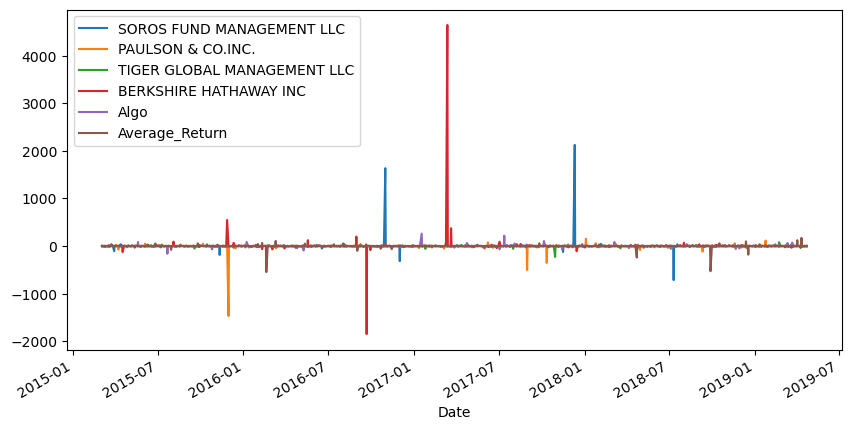

In [1829]:
daily_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

In [1830]:
# Calculate cumulative returns of all portfolios
Cumulative_returns = (1 + Combined_df).cumprod() -1
Cumulative_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo,Average_Return
Date,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,0.440785
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.268662
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,2.092709
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,0.877595
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,4.117204
...,...,...,...,...,...,...
2019-04-15,0.157839,-0.213494,-0.137203,0.525584,0.958591,-1.000000
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,-1.000000
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,-1.000000


<Axes: title={'center': 'Cumulative Returns of MSFT over the Last 10 Years'}, xlabel='Date'>

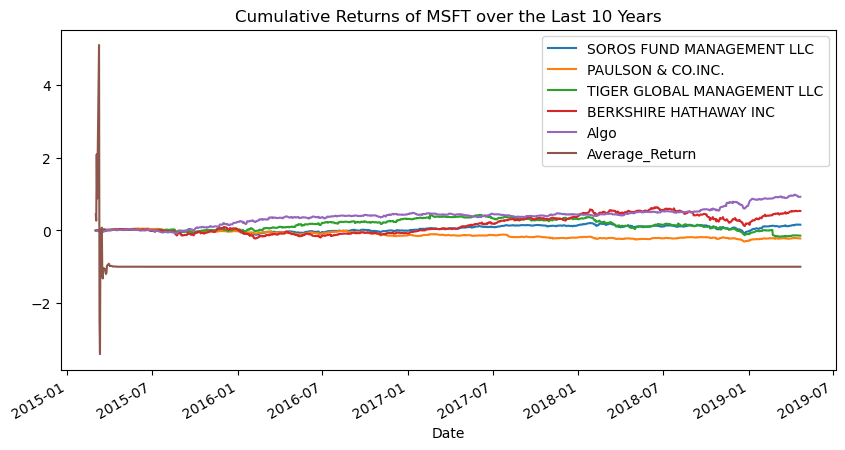

In [1831]:
# Plot cumulative returns
Cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of MSFT over the Last 10 Years")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [1832]:
# Box plot to visually show risk


### Calculate Standard Deviations

<Axes: >

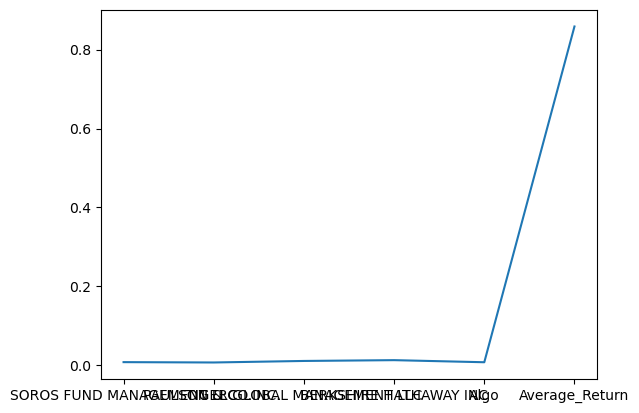

In [1833]:
# Calculate the daily standard deviations of all portfolios
Combined_df.std().plot()

### Determine which portfolios are riskier than the S&P 500

<Axes: >

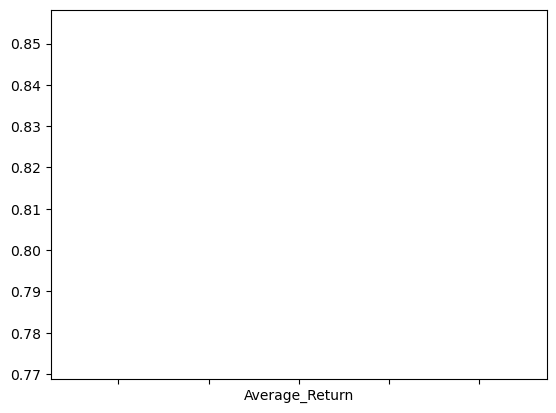

In [1834]:
# Calculate  the daily standard deviation of S&P 500
sp500s_df.std().plot()

<Axes: >

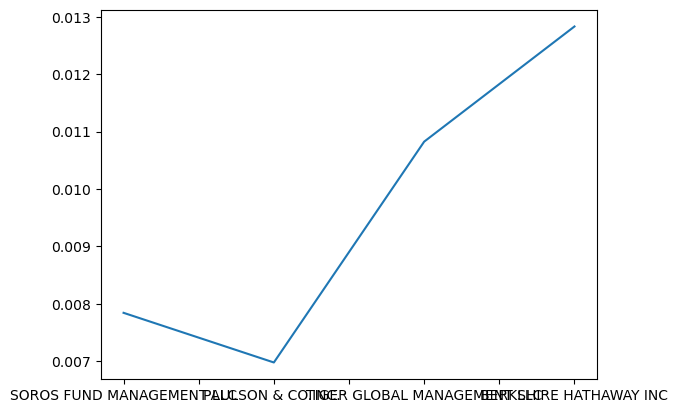

In [1835]:

# Determine which portfolios are riskier than the S&P 500
whale_df.std().plot()

<Axes: >

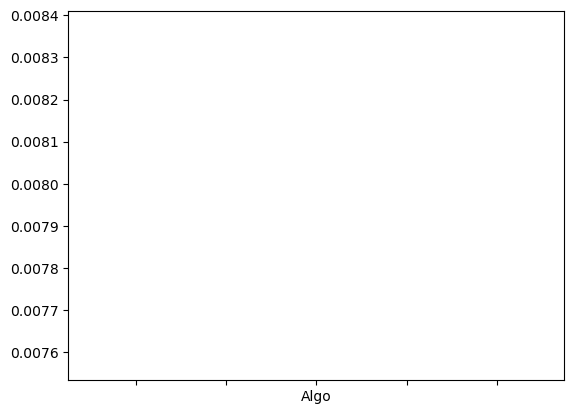

In [1836]:
algo_rythm_df.std().plot()

### Calculate the Annualized Standard Deviation

In [1837]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

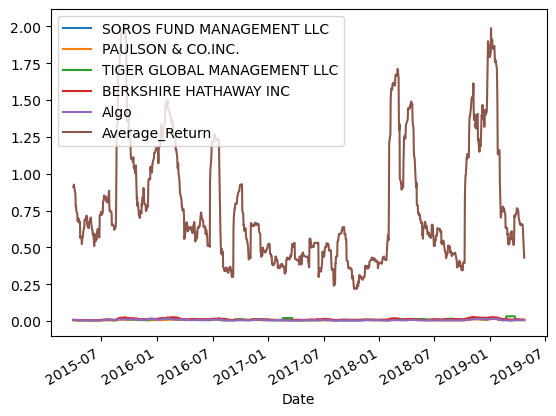

In [1838]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
Combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [1839]:
# Calculate the correlation
sp_whale_df=pd.concat([whale_df,sp500s_df], axis="columns", join="inner")
sp_whale_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Average_Return
Date,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.440785
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.119465
2015-03-05,0.004016,0.004076,0.002355,0.006726,1.437772
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.392896
2015-03-09,0.000582,0.004225,0.005843,-0.001652,1.725403
...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.050911
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.227896
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.157658


In [1840]:
sp_whale_df.drop(columns=["SOROS FUND MANAGEMENT LLC", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"], inplace=True)
sp_whale_df

,PAULSON & CO.INC.,Average_Return
Date,,
2015-03-03,-0.004981,0.440785
2015-03-04,0.003241,-0.119465
2015-03-05,0.004076,1.437772
2015-03-06,-0.003574,-0.392896
2015-03-09,0.004225,1.725403
...,...,...
2019-04-15,-0.001156,-0.050911
2019-04-16,0.000388,0.227896
2019-04-17,-0.006467,-0.157658


KeyError: 'Paulson&CO.INC'

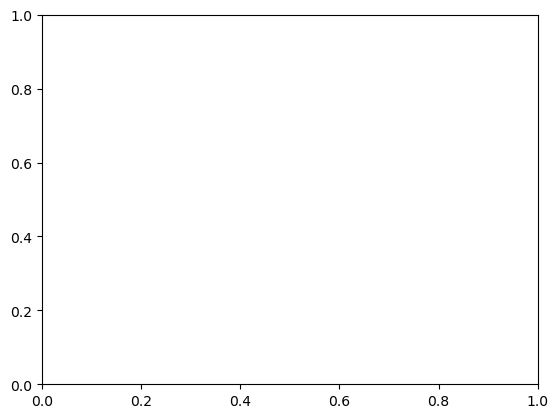

In [1841]:
# Display de correlation matrix
sp_whale_df.plot(kind='scatter', x='Paulson&CO.INC', y='Average_Return')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!